In [1]:
# import libraries

## PART 1
import pandas as pd
import matplotlib.pyplot as plt

## PART 2
import numpy as np # Math
#import talib    # SMA / RSI
import statsmodels.api as sm  #Linear Modeling
import seaborn as sns # heatmap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [7, 6]
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
!pip install statsmodels 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install talib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [4]:

# Converting CSV to Dataframe
cereal_df = pd.read_csv("Cereals.xls")

In [5]:
# see first 5 rows of data
cereal_df.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [6]:
# Checking number of rows
cereal_df.shape

(77, 23)

In [7]:
# Checking if there is any missing data
cereal_df.isnull().values.any()

True

In [8]:

# Checking in what rows there is missing data
cereal_df[cereal_df.isna().any(axis=1)]

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,...,1.0,1.00,64.533816,0,1,0,0,0,0,0
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,...,1.0,0.67,50.828392,0,0,1,0,0,0,0


In [9]:
# Removing rows with missing data
cereal_df = cereal_df.dropna()

In [10]:
# Checking number of rows (after removing missing data)
cereal_df.shape

(74, 23)

In [11]:
# To see the names of all columns
cereal_df.columns

Index(['Name', 'Manuf', 'Type', 'Calories', 'Protein', 'Fat', 'Sodium',
       'Fiber', 'Carbo', 'Sugars', 'Potass', 'Vitamins', 'Shelf', 'Weight',
       'Cups', 'Rating', 'Cold', 'Nabisco', 'Quaker', 'Kelloggs',
       'GeneralMills', 'Ralston', 'AHFP'],
      dtype='object')

In [12]:
# Calculating Correlation between Nutritional Rating and Sugars 
corr = cereal_df[ ['Rating', 'Sugars']].corr()
corr


,Rating,Sugars
Rating,1.000000,-0.755955
Sugars,-0.755955,1.000000


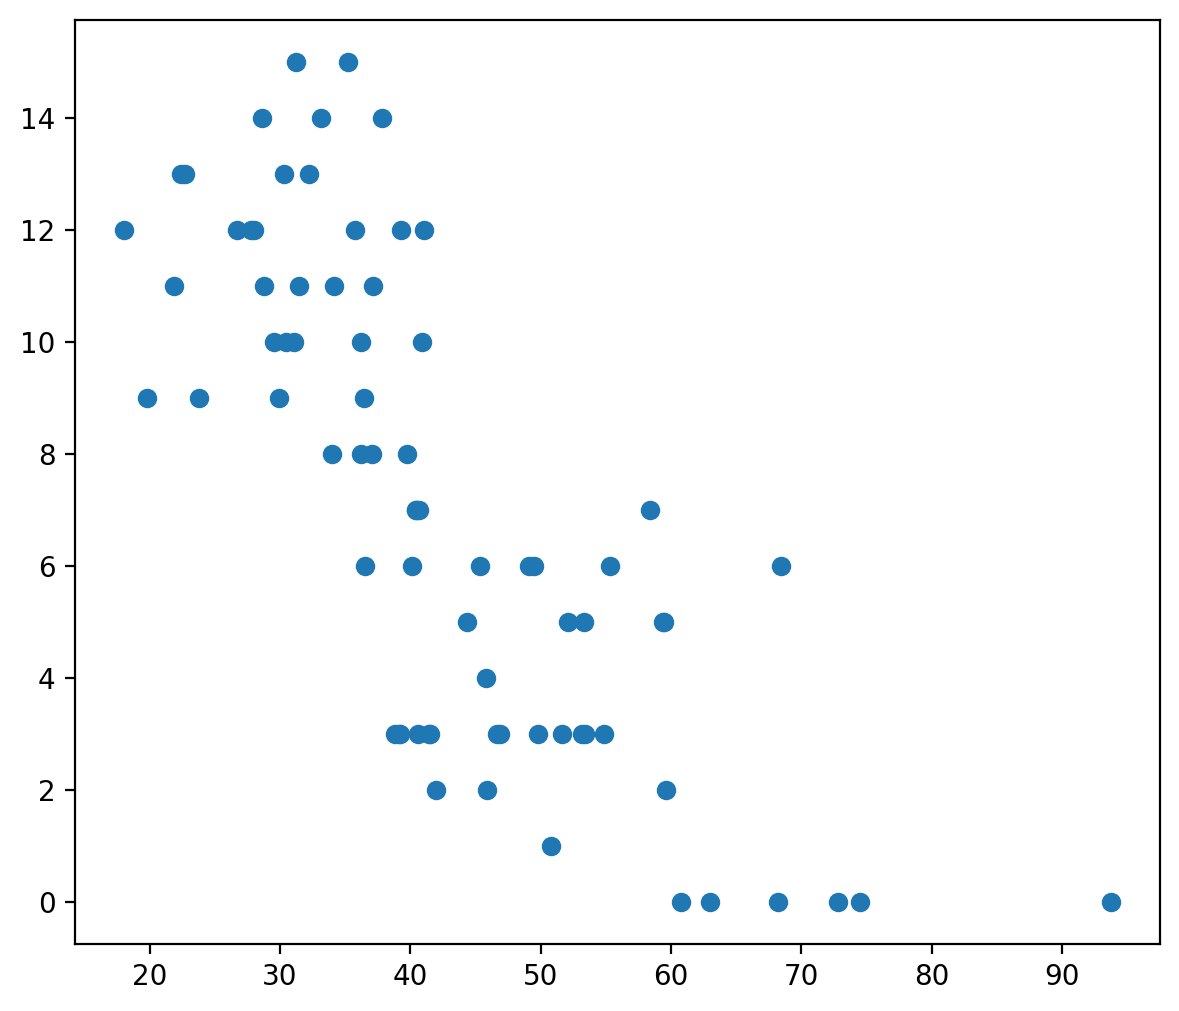

In [13]:
# scatterplot of Nutritional Rating vs Sugars to check correlation (negative strong = -0.76)
plt.scatter(cereal_df['Rating'], cereal_df['Sugars'])
plt.show()

In [14]:
# Calculating Correlation between Nutritional Rating and Fiber
corr = cereal_df[ ['Rating', 'Fiber']].corr()
corr

,Rating,Fiber
Rating,1.000000,0.603411
Fiber,0.603411,1.000000


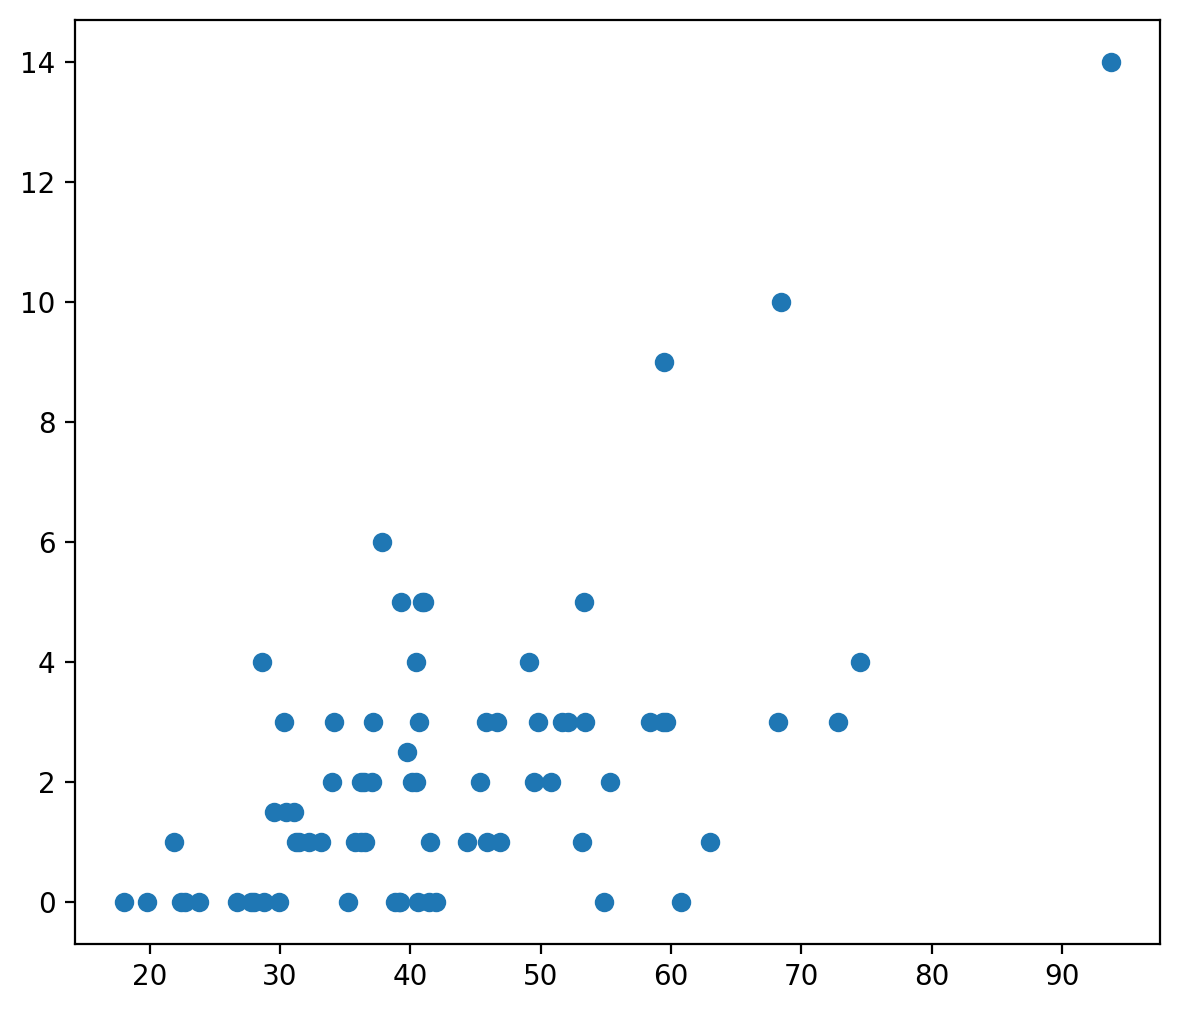

In [15]:
# scatterplot of Nutritional Rating vs Fiber to check correlation (positive weak = 0.6)
plt.scatter(cereal_df['Rating'], cereal_df['Fiber'])
plt.show()

In [16]:
# Creating a list with the names of the features we will use
feature_names = ['Sugars', 'Fiber']
feature_names 

['Sugars', 'Fiber']

In [17]:
# Creating features and targets
features = cereal_df[feature_names]
targets = cereal_df['Rating']

# Creating DataFrame from target column and feature columns
feature_and_target_cols = ['Rating'] + feature_names
feature_targ_df = cereal_df[feature_and_target_cols]

In [18]:
# checking dimensions of targets
targets.shape

(74,)

In [19]:

# checking dimensions of features
features.shape

(74, 2)

In [20]:
# Calculating correlation matrix
corr_mat = feature_targ_df.corr()
corr_mat

,Rating,Sugars,Fiber
Rating,1.000000,-0.755955,0.603411
Sugars,-0.755955,1.000000,-0.150949
Fiber,0.603411,-0.150949,1.000000


Defaulting to user installation because normal site-packages is not writeable


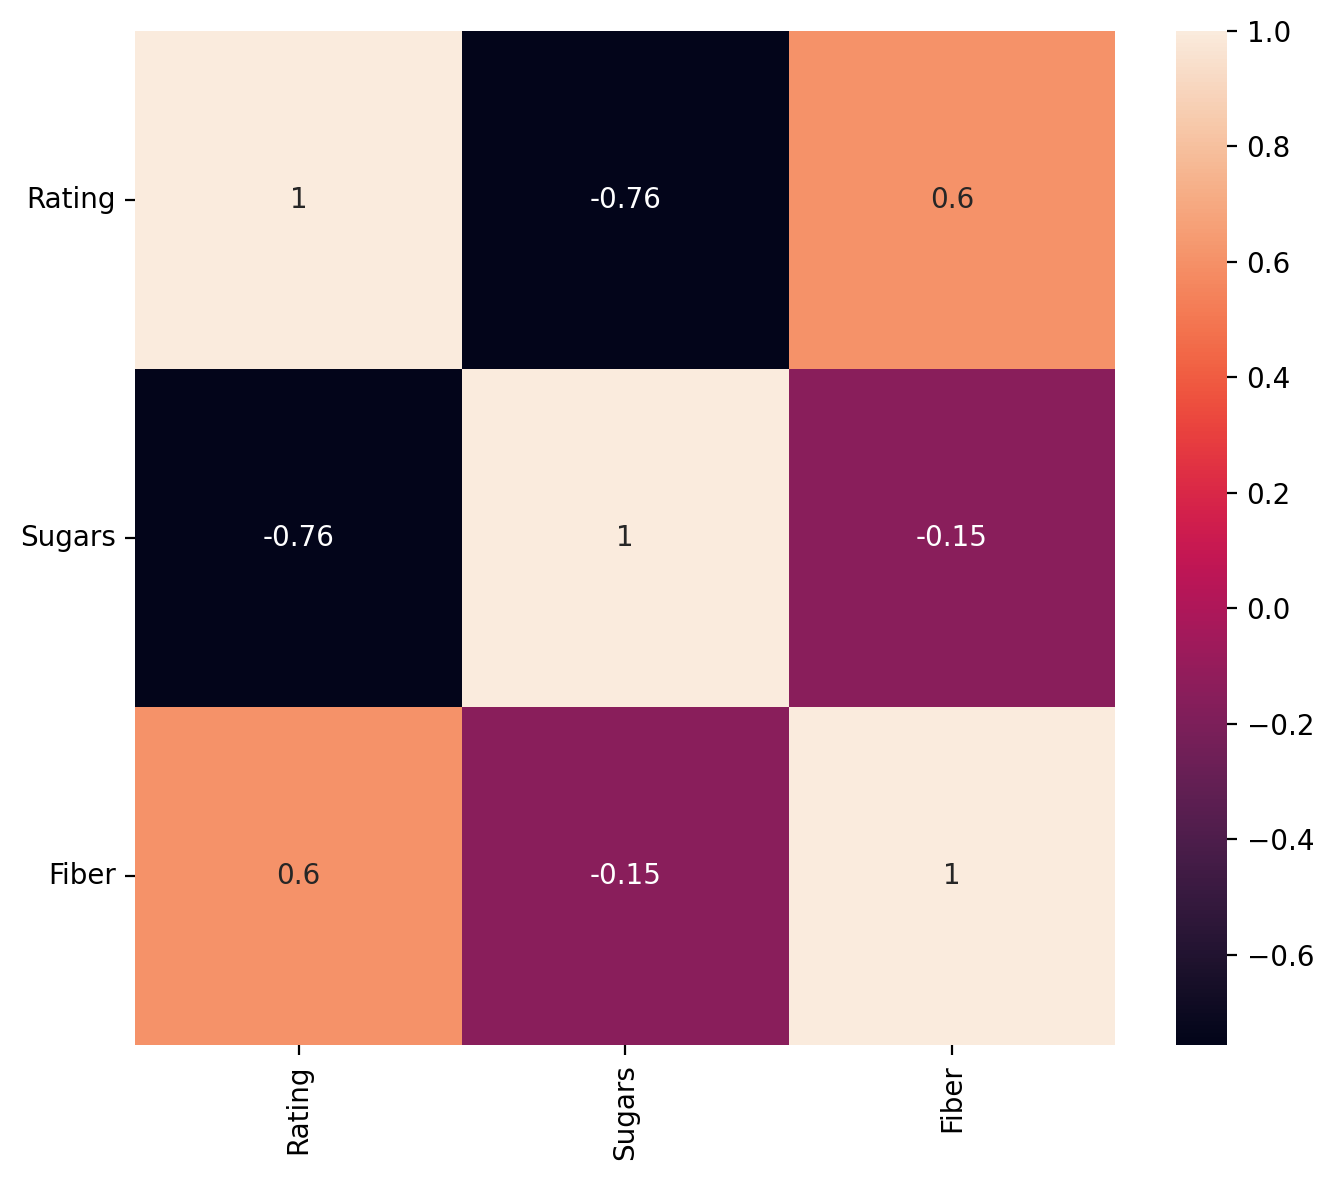

<Figure size 700x600 with 0 Axes>

In [21]:
!pip install seaborn
import seaborn as sns

# Plotting heatmap of correlation matrix
sns.heatmap(corr_mat, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90) # Fix ticklabel directions
plt.tight_layout() # fits plot area to the plot, "tightly"
plt.show() # show the plot
plt.clf() # clear the plot area

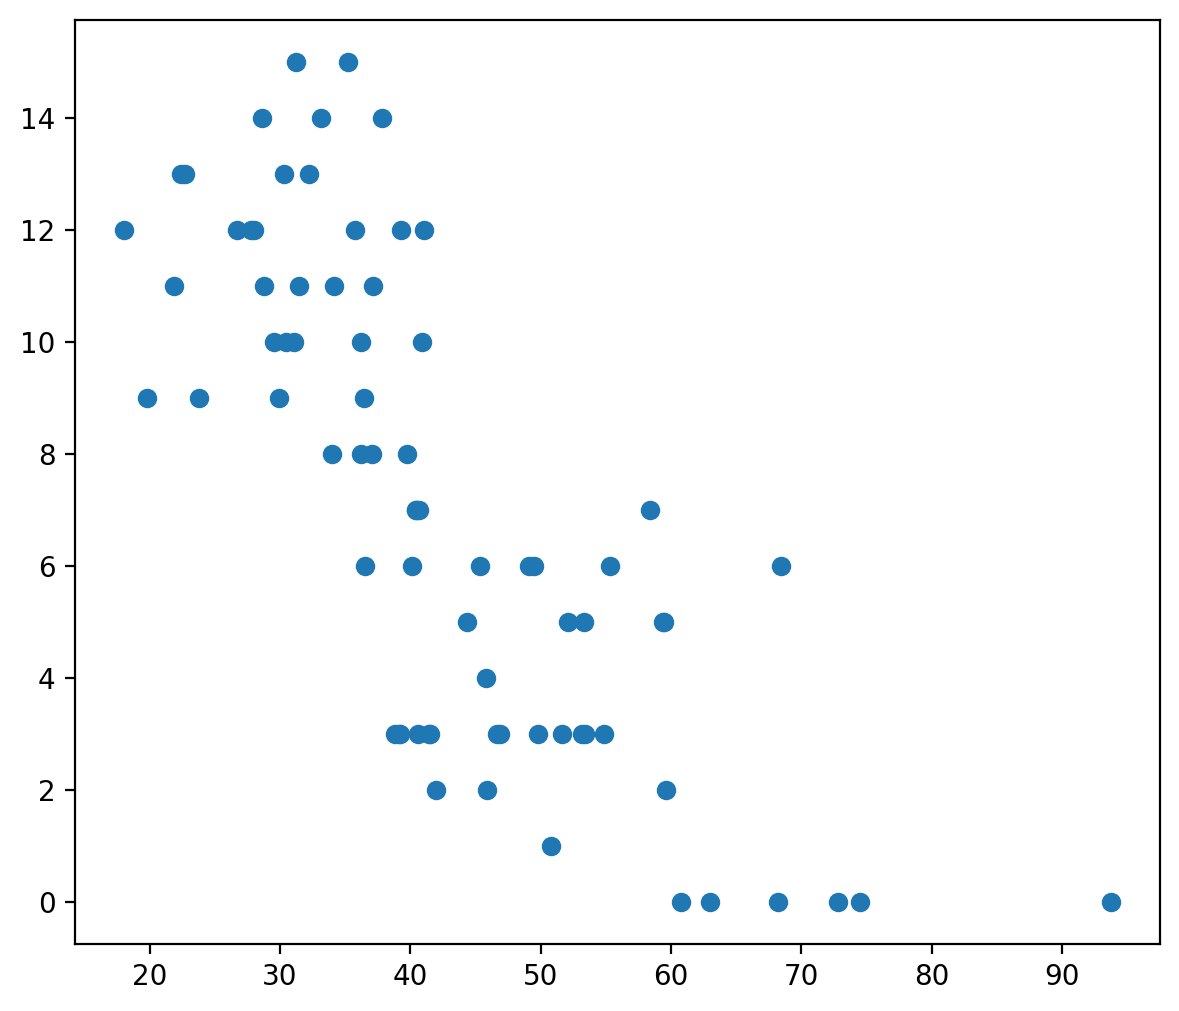

In [22]:
# Create a scatter plot of the most highly correlated variable (Sugars) with the target (Rating)
plt.scatter(cereal_df['Rating'], cereal_df['Sugars'])
plt.show()

In [24]:
# we can fit our first machine learning Linear model
# need to add a constant to feature (column of ones = y-intercept)

# Adding a constant to our features
linear_features = sm.add_constant(features)

# Creating a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])

# Training set
train_features = linear_features[:train_size]
train_targets = targets[:train_size]

# Test set
test_features = linear_features[train_size:]
test_targets = targets[train_size: ]

print(linear_features.shape, train_features.shape, test_features.shape)

(74, 3) (62, 3) (12, 3)


/home/u188443/tmp/ipykernel_1845264/693959519.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_targets = targets[:train_size]
/home/u188443/tmp/ipykernel_1845264/693959519.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_targets = targets[train_size: ]


In [25]:
# Fitting a Linear Model
model = sm.OLS(train_targets, train_features)
results = model.fit() # fit the model

# Getting all the Statistics including R^2 value and Standard Errors
results.summary()

# R^2 is 0.83 ~ very good model (close to 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     143.5
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.19e-23
Time:                        05:28:32   Log-Likelihood:                -197.11
No. Observations:                  62   AIC:                             400.2
Df Residuals:                      59   BIC:                             406.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7462      1.770     29.233      0.000      48.204      55.288
Sugars        -2.2204      0.183    -12.138      0.000      -2.586      -1.854
Fiber          2.8796      0.301      9.560      0.000       2.277       3.482
==============================================================================
Omnibus:                        6.377   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.786
Skew:                           0.738   Prob(JB):                       0.0554
Kurtosis:                       3.248   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Examine the p-values
# Features with p<= 0.05 are typically considered significantly different from 0

results.pvalues

const     8.456383e-37
Sugars    1.111691e-17
Fiber     1.348279e-13
dtype: float64

In [27]:
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

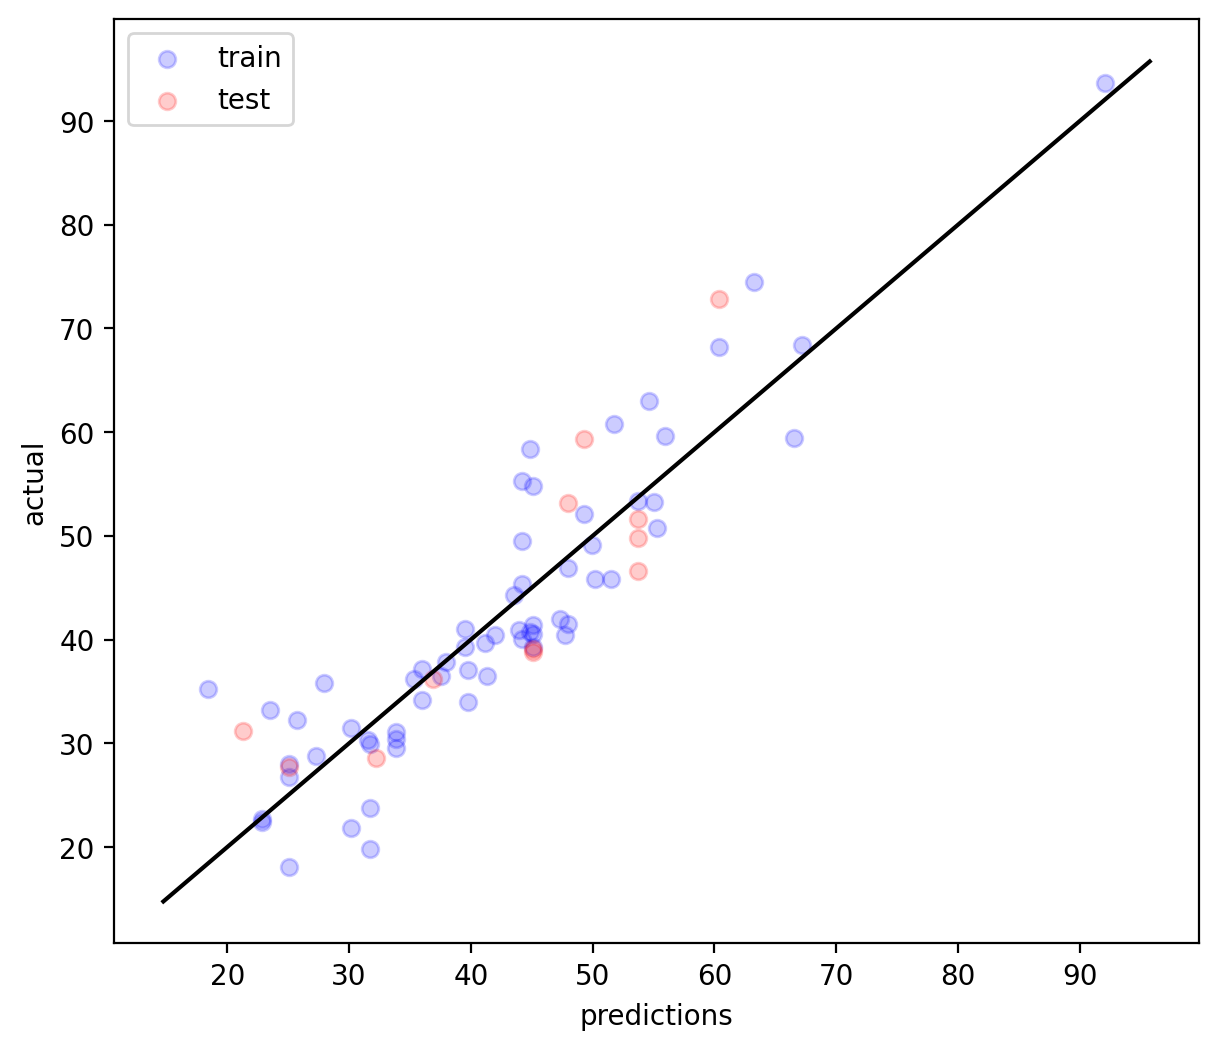

In [28]:
# Seeing how good the predictions are, is our model any good?
# Plotting the prediction versus the actual values of the targets

# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [29]:
cereal_df = pd.read_csv("Cereals.xls")

# removing missing data

cereal_df = cereal_df.dropna()

In [30]:
feature_names = ['Sugars', 'Fiber']
feature_names 

['Sugars', 'Fiber']

In [31]:
# Creating features and targets
features = cereal_df[feature_names]
targets = cereal_df['Rating']

# Creating DataFrame from target column and feature columns
feature_and_target_cols = ['Rating'] + feature_names
feature_targ_df = cereal_df[feature_and_target_cols]

# Creating a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])

# Training set
train_features = features[:train_size]
train_targets = targets[:train_size]

# Test set
test_features = features[train_size:]
test_targets = targets[train_size: ]

/home/u188443/tmp/ipykernel_1845264/1788254863.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_targets = targets[:train_size]
/home/u188443/tmp/ipykernel_1845264/1788254863.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_targets = targets[train_size: ]


In [32]:
print(features.shape, train_features.shape, test_features.shape)

(74, 2) (62, 2) (12, 2)


In [37]:
# Some models like neural networks work better with scaled data - so we need to standardize our data

# Scaling options: standardization
# subtracts the mean from all data points, the divides by the standard deviation - sets mean to 0 and standard deviation to 1

from sklearn.preprocessing import scale

# fits the scaler to the training data and transforms it at the same time
scaled_train_features = scale(train_features)

# transforms test data
scaled_test_features = scale(test_features)

In [39]:
# Libraries
!pip install keras
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.1 MB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3

2023-03-16 05:35:23.887328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 05:35:25.253632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /glob/development-tools/versions/oneapi/2023.0.1/oneapi/vpl/2023.0.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/tbb/2021.8.0/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/rkcommon/1.10.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray_studio/0.11.1/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray/2

In [40]:
model_1 = Sequential()
model_1.add(Dense(300, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(150, activation='relu'))
model_1.add(Dense(1, activation='linear'))

2023-03-16 05:35:43.814300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /glob/development-tools/versions/oneapi/2023.0.1/oneapi/vpl/2023.0.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/tbb/2021.8.0/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/rkcommon/1.10.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray_studio/0.11.1/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray/2.10.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/openvkl/1.3.1/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/oidn/1.4.3/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/mpi/2021.8.0//libfabric/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/mpi/2021.8.0//lib/release:/glob/development-tools/versions/oneapi

In [42]:
model_1.compile(optimizer='adam', loss='mse')

history = model_1.fit(scaled_train_features, train_targets, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 1370.8123
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 1315.5352
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 1258.5099
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 1201.4697
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 1137.3042
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 1075.9783
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 1013.4995
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 945.3907
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 880.6614
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 814.4047
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 744.8607
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 678.2090
Epoch 13/200
2/2 [============

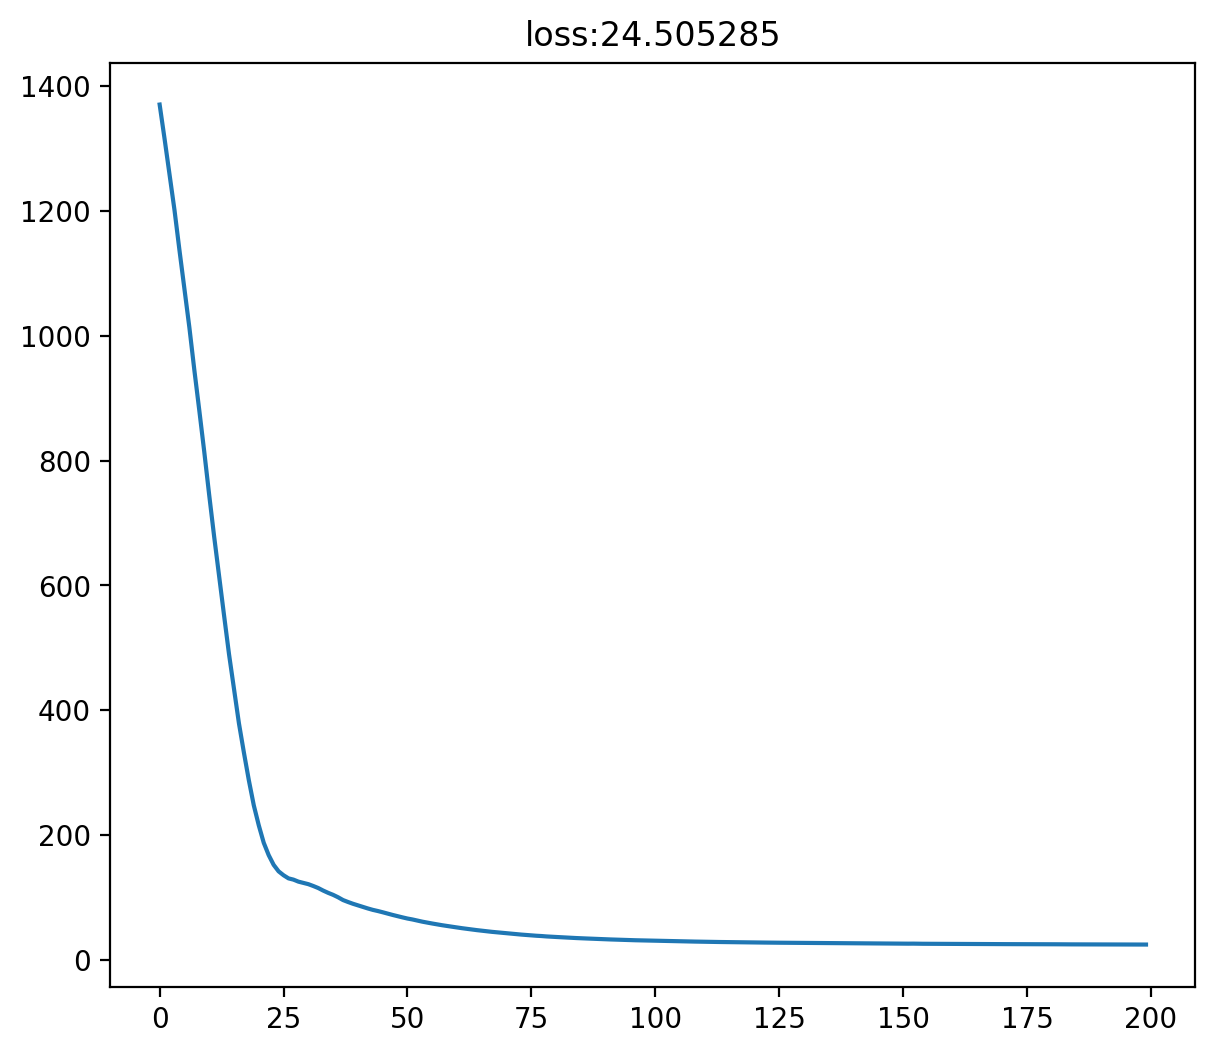

In [43]:
# Now we need to check that our training loss has flattened out and the net is sufficiently trained.

# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

1/1 [==============================] - 0s 15ms/step
R^2 value for Training Set:  0.8765064641285553
R^2 value for Test Set:  0.613177330634527


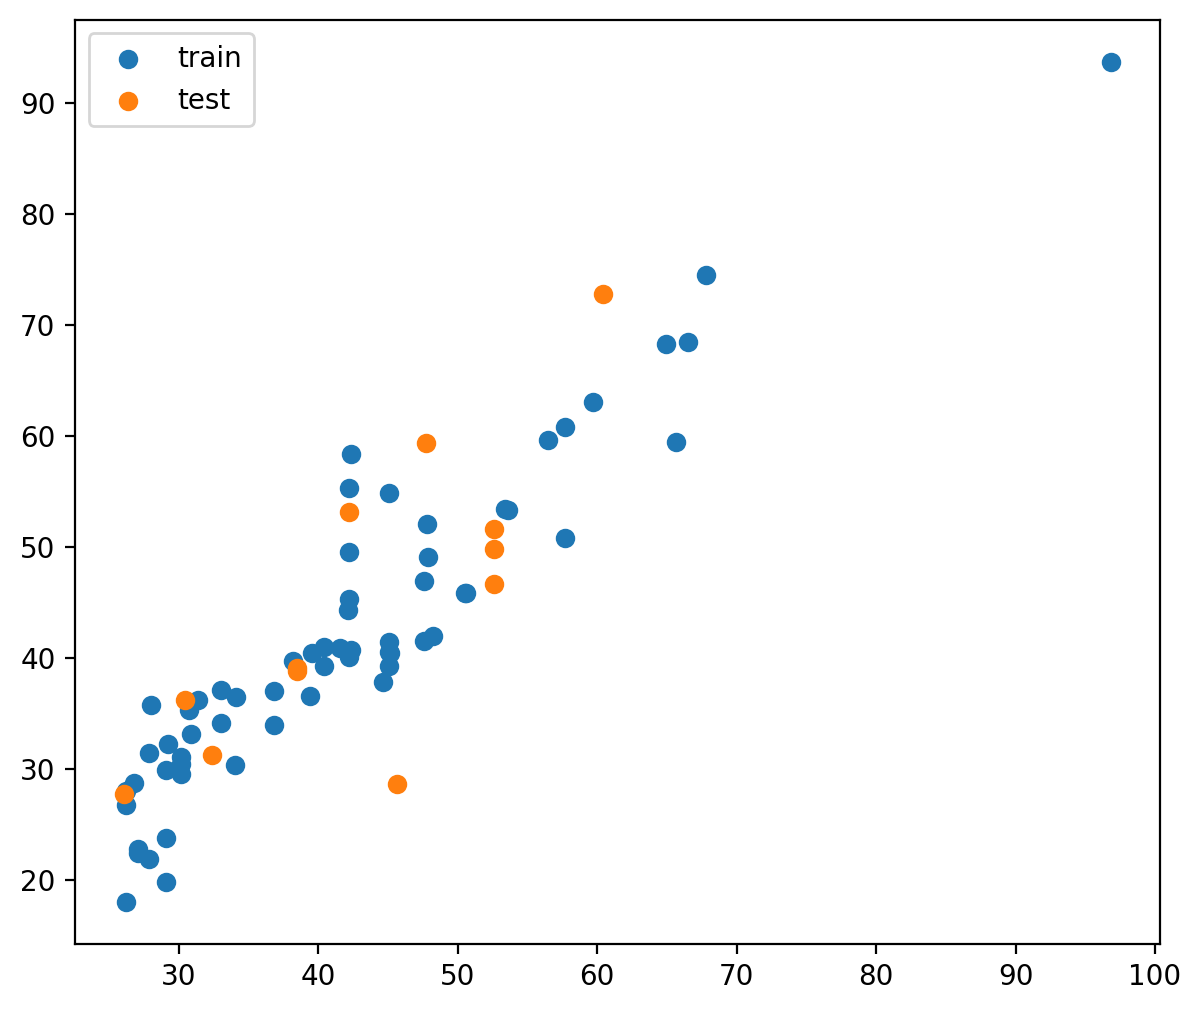

In [44]:
# Measure performance
# checking performance to see how well the model is predicting new values

from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print("R^2 value for Training Set: ", r2_score(train_targets, train_preds))
print("R^2 value for Test Set: ", r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()